Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, April 30, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will have to work with ```pandas``` and ```seaborn```. ```pandas``` is one of the most preferred and widely used tools in data processing. What’s cool about ```pandas``` is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called 'data frame' that looks very similar to tables in a statistical software (think Excel or SPSS for example). ```pandas``` makes data processing a lot easier in comparison to working with lists and/or dictionaries through for-loops or list comprehension.  
```seaborn``` is a library for making plots. It is based on ```matplotlib``` but offers more functions speicialized for statistical visualization. Also most people agree that ```seaborn``` looks more legit.

Don't forget that you we will also give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [74]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

```matplotlib``` and ```seaborn``` should already be installed in your environment. If not please run:
```sh
pip install seaborn
```

### a) Importing a csv file [2 pts]

Import the csv files of all subjects into one dataframe. Make sure that each row has a unique index. You might want to take a look at what ***pandas.concat*** does.<br>
Extra fun: Display the output of the dataframe using the ***pandas.set_option*** function to display the data in a well-arranged way. Play a little bit around with the settings that you are allowed to change.<br>
Save ```df_concatenated```.


In [75]:
import glob
import os
from pathlib import Path

curr_directory = os.getcwd() # Fetching the current directory: ./week-4-acc_4

PATH = curr_directory + "/Data_group4" # Directory containing data files for group 4 only
all_files = sorted(glob.glob(os.path.join(PATH, "*.csv")))

df_concatenated = pd.concat([pd.read_csv(file) for file in all_files], ignore_index=True, sort=False)

# Use pd.set_option here to display in a nice way
pd.set_option('display.width',100)
pd.set_option('max_colwidth', 100)
pd.set_option('display.colheader_justify', 'center')

# Save concatenated dataframe to seperate directory
process_directory = curr_directory + '/Processed'

# Create directory if not exists
if not os.path.exists(process_directory):
    os.mkdir(process_directory)

# Writing the csvfile for group 4's concatenated data into the directory
df_concatenated.to_csv(Path(process_directory, 'data_concatenated.csv'), index=False, header=True)

### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False*.

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [76]:
# Add a column "congruence"
df_concatenated['congruence'] = df_concatenated['StimulusType'] == df_concatenated['response']

# Create a new dataframe 'df_RT' for averaged RT (reaction time)
df_RT = df_concatenated[df_concatenated['RT'] != 0].groupby(['SubjectID', 'StimulusType'])[['RT']].mean()

# Create a new dataframe 'df_accuracy' for congruence level
df_accuracy = df_concatenated[df_concatenated['congruence'] == True].groupby(['SubjectID', 'StimulusType']) \
                [['congruence']].count().groupby(['SubjectID', 'StimulusType'])[['congruence']].\
                transform(lambda x: (x/20) if (x<=20).bool() else (x/80))

# Add accuracy as new column
df_concatenated_avg = df_RT
df_concatenated_avg['accuracy'] = df_accuracy

# Filling NANs with 0 for NOGO stimulus type which recorded no response from the subject in all NOGO trials
df_concatenated_avg['RT'].fillna(0, inplace=True)

# Save averaged dataframe
df_concatenated_avg.to_csv(Path(process_directory, 'data_concatenated_averaged.csv'), index=True, header=True)

## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

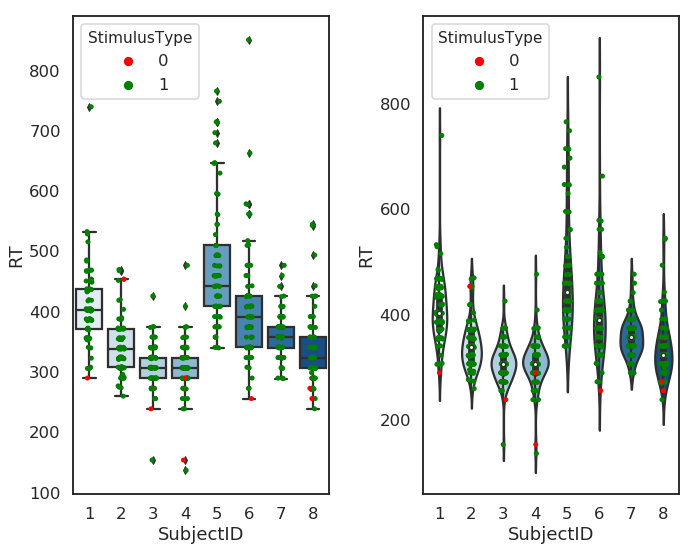

In [16]:
# read data
data_concat = pd.read_csv(os.getcwd() + "/Processed/data_concatenated.csv")
# drop all rows where the RT is 0
data_concat = data_concat[data_concat.RT != 0]

# create two axes
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.set(context = "talk", style="white", palette="Accent", font_scale=1, rc={'figure.figsize':(10,8)})
# set the list of colors for the stimulus type
colors = ["red", "green"]

# first subplot with stripplot and boxplot
plt.subplot(1,2,1)
sns.stripplot(data = data_concat, x='SubjectID', y='RT', hue="StimulusType", jitter=True, palette=colors)
sns.boxplot(data = data_concat, x='SubjectID', y='RT', palette = "Blues")

# second subplot with stripplot and violinplot
plt.subplot(1,2,2)
sns.stripplot(data = data_concat, x='SubjectID', y='RT', hue="StimulusType", jitter=True, palette=colors)
sns.violinplot(data = data_concat, x='SubjectID', y='RT', palette="Blues")

# handling legends
# TODO

fig.tight_layout()
plt.show()

### b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

In [77]:
# again create a concatenated dataframe over all (averaged) groups.
# Don't forget to modify the Subject ID
PATH = curr_directory + "/Data_all" # Directory containing data files for all groups
all_files = sorted(glob.glob(os.path.join(PATH, "*.csv")))

In [78]:
# Make dataframe with all data across all groups. To make sure SubjectID is according to 
# convention, we use the filename as SubjectID.
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename)
    df['SubjectID'] = pd.Series([filename.split('/')[-1].split('.')[0] for _ in range(100)])
    all_dfs.append(df)
df_all_concat = pd.concat(all_dfs, ignore_index=True, sort=False)

# Save Dataframe locally
df_all_concat.to_csv(Path(process_directory, 'data_concatenated_all.csv'), index=False, header=True)

In [79]:
# Compute average RT and accuracy for each subject in the big dataframe just created
# Uncommented because same code as in 1b but for different dataframe
df_all_concat['congruence'] = df_all_concat['StimulusType'] == df_all_concat['response']
df_all_RT = df_all_concat[df_all_concat['RT'] != 0].groupby(['SubjectID', 'StimulusType'])[['RT']].mean()
df_all_accuracy = df_all_concat[df_all_concat['congruence'] == True].groupby(['SubjectID', 'StimulusType']) \
                [['congruence']].count().groupby(['SubjectID', 'StimulusType'])[['congruence']].\
                transform(lambda x: (x/20) if (x<=20).bool() else (x/80))
df_all_concat_avg = df_all_RT
df_all_concat_avg['accuracy'] = df_all_accuracy
df_all_concat_avg['RT'].fillna(0, inplace=True)
df_all_concat_avg.to_csv(Path(process_directory, 'data_concatenated_all_averaged.csv'), index=True, header=True)

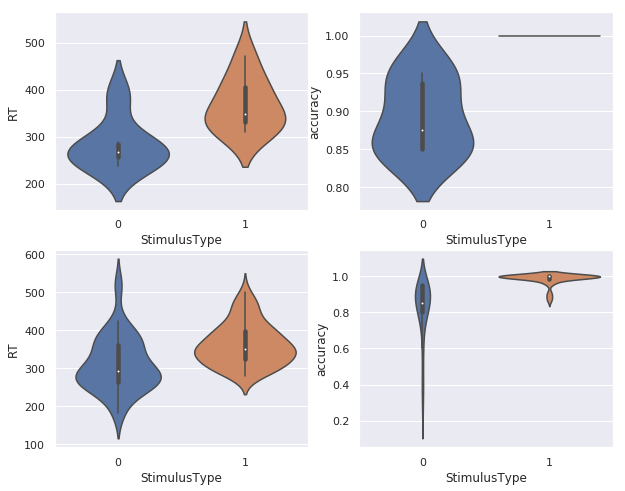

In [80]:
df_all_concat_avg = pd.read_csv(Path(process_directory, 'data_concatenated_all_averaged.csv'))
df_concat_avg = pd.read_csv(Path(process_directory, 'data_concatenated_averaged.csv'))

# Now it's time to plot your results
#figs, axes = plt.subplots(nrows=2, ncols=2, sharey="row")

# violin plot for your group's data
go = df_all_concat_avg[df_all_concat_avg['StimulusType']==1]
nogo = df_all_concat_avg[df_all_concat_avg['StimulusType']==0]
plt.subplot(221)
sns.violinplot(data=df_concat_avg, x='StimulusType', y='RT')
plt.subplot(222)
sns.violinplot(data=df_concat_avg, x='StimulusType', y='accuracy')
# violin plot of all group's data
plt.subplot(223)
sns.violinplot(data=df_all_concat_avg, x='StimulusType', y='RT')
plt.subplot(224)
sns.violinplot(data=df_all_concat_avg, x='StimulusType', y='accuracy')

Compare two datasets and relate it with CLT. Write your opinion here.

As one can tell from the plots, the data for a single group has a more skewed distribution compared to the data of all groups (as the white dot which represents the mean is located further away from the center of the thick black bar which represents the standard deviation). This is in accordance with the CLT, because it means it's approaching a more gaussian distribution for larger data.

### c) Scatterplot [1 pts]

Make a scatterplot comparing RT and accuracy. Do you see some correlation?

Yes, there seems to be a slightly positive correlation (higher accuracy <-> longer RT), which makes intuitive sense, because for longer reaction times, one has a higher chance of hitting the right response.

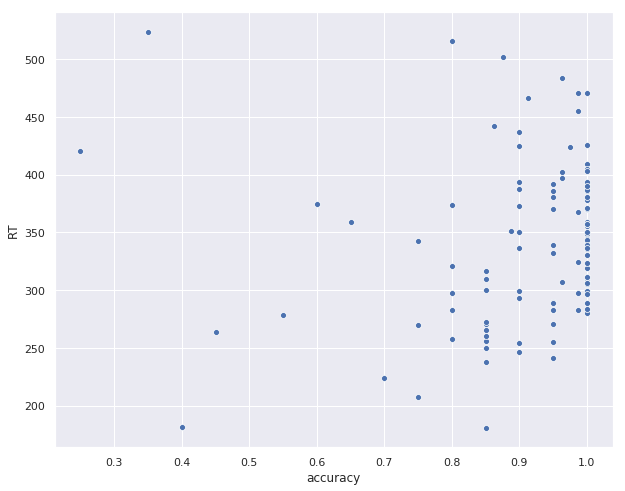

In [89]:
sns.scatterplot(data=df_all_concat_avg, x='accuracy', y='RT')